# Data Augmentation To Address Overfitting In Flower Classification CNN

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc.**

In the image below, 4 new training samples are generated from the original sample using different transformations.

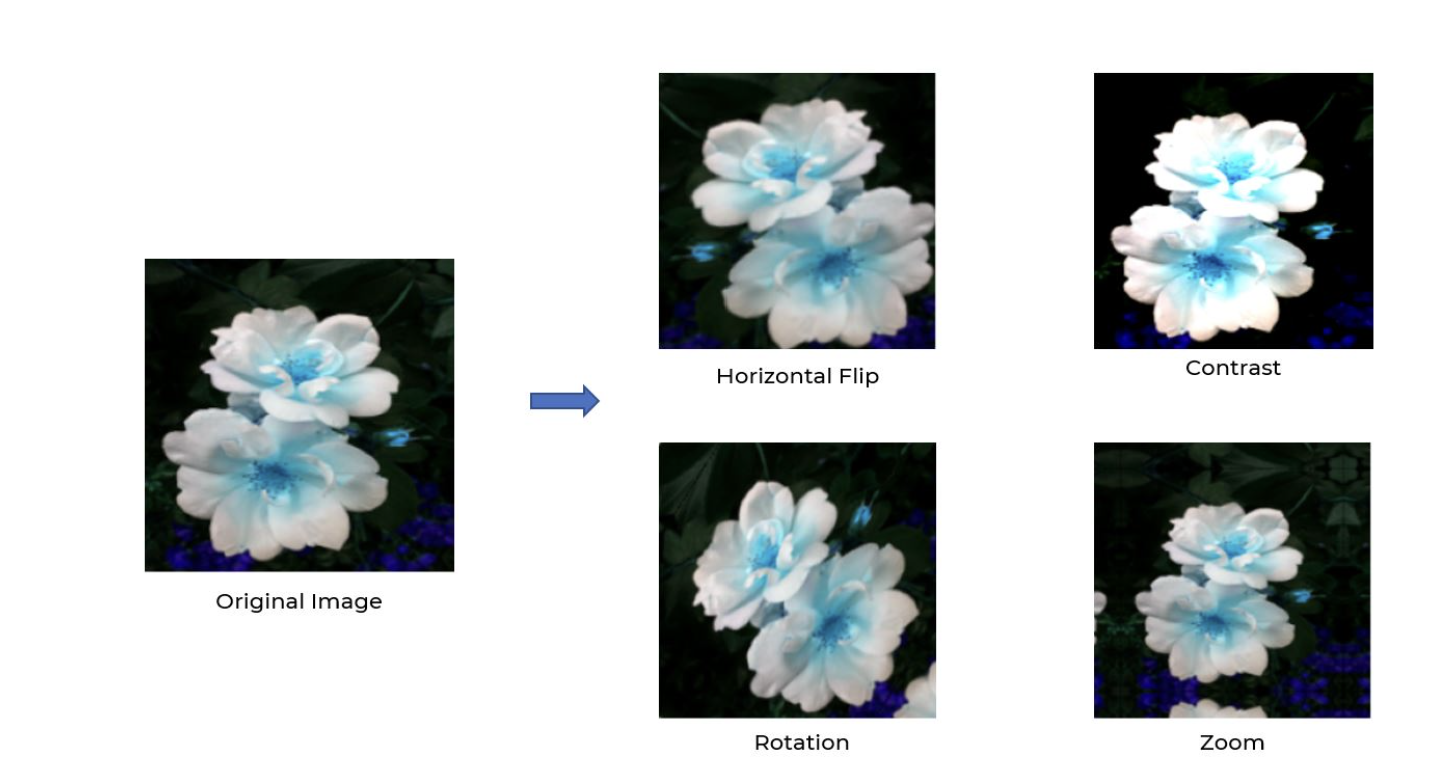

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir= "C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network", untar=True)

228813984/228813984 [==============================] - 103s 0us/step


In [5]:
data_dir

'C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

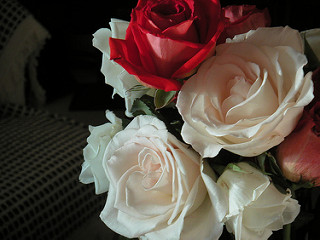

In [10]:
PIL.Image.open(str(roses[1]))

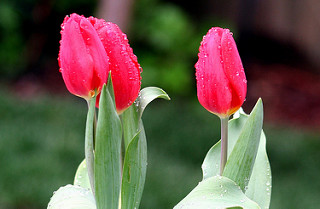

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Let's create a dictionary of the different types of flowers**

In [20]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')), 
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [21]:
flowers_images_dict ['roses'][:5]

[WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/nduku/OneDrive/Documents/03 Personal Projects/Data Science Projects/Deep Learning/Convolutional Neural Network/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
str(flowers_images_dict['roses'][0])

'C:\\Users\\nduku\\OneDrive\\Documents\\03 Personal Projects\\Data Science Projects\\Deep Learning\\Convolutional Neural Network\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [25]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

**To train the model all the images need to be of the same size**

In [26]:
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [28]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
y[:5]

[0, 0, 0, 0, 0]

In [31]:
X[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [32]:
X = np.array(X)
y = np.array(y)


# Train test split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [34]:
len(X_train)

2752

In [36]:
len(X_test)

918

In [37]:
round(len(X_test) / len(X_train)*100,2)

33.36

# Preprocessing: scale images

In [38]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [40]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

# Build convolutional neural network and train it

In [41]:
num_classes = 5 #because we have types of flowers

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 21s 227ms/step - loss: 1.4412 - accuracy: 0.3910
Epoch 2/30
86/86 [==============================] - 20s 228ms/step - loss: 1.0516 - accuracy: 0.5719
Epoch 3/30
86/86 [==============================] - 19s 224ms/step - loss: 0.8750 - accuracy: 0.6693
Epoch 4/30
86/86 [==============================] - 19s 216ms/step - loss: 0.6443 - accuracy: 0.7565
Epoch 5/30
86/86 [==============================] - 19s 215ms/step - loss: 0.4583 - accuracy: 0.8299
Epoch 6/30
86/86 [==============================] - 19s 219ms/step - loss: 0.2757 - accuracy: 0.9073
Epoch 7/30
86/86 [==============================] - 19s 222ms/step - loss: 0.1399 - accuracy: 0.9575
Epoch 8/30
86/86 [==============================] - 19s 222ms/step - loss: 0.0811 - accuracy: 0.9782
Epoch 9/30
86/86 [==============================] - 19s 222ms/step - loss: 0.0813 - accuracy: 0.9797
Epoch 10/30
86/86 [==============================] - 19s 222ms/step - loss: 0.0853 - accura

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 66ms/step - loss: 3.0168 - accuracy: 0.6340


[3.016819477081299, 0.6339869499206543]

The model is likely over fitted

In [43]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 65ms/step


array([[ 11.7161    ,  26.405773  ,  -2.6395745 ,  -9.96006   ,
         -9.31382   ],
       [  8.604919  ,   1.697163  ,  -8.184703  ,   2.5394466 ,
          4.7140574 ],
       [ -0.5317851 ,   6.078832  ,  16.967426  , -15.860978  ,
         -6.0971837 ],
       ...,
       [  6.966359  ,  -3.953055  ,  -7.283059  ,  10.812066  ,
          7.7137175 ],
       [  0.84118974,   1.7945236 ,   6.8687477 ,   0.73990864,
        -10.131202  ],
       [  3.9376948 , -12.240988  ,   0.78320134,  11.140914  ,
          7.1303563 ]], dtype=float32)

In [45]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.1721100e-07, 9.9999964e-01, 2.4308929e-13, 1.6088632e-16,
       3.0702779e-16], dtype=float32)>

In [46]:
np.argmax(score)

1

In [47]:
y_test[0]

1

Original Image

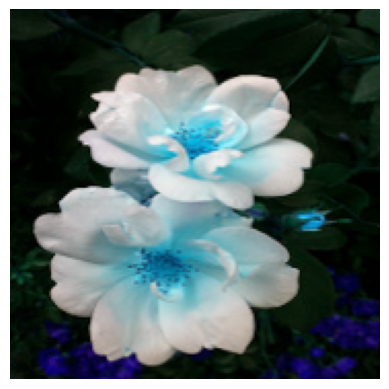

In [48]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

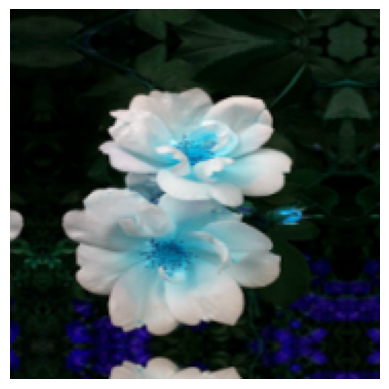

In [49]:
data_augmentation  = keras.Sequential([layers.experimental.preprocessing.RandomZoom(0.3)])
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

This image appears zoomed out, at the bottom you can see the image has more padding on all four sides (top, bottom, left, right)

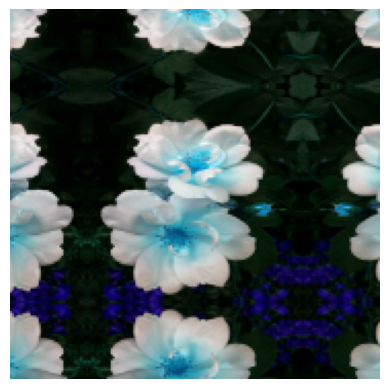

In [50]:
data_augmentation  = keras.Sequential([layers.experimental.preprocessing.RandomZoom(0.9)])
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Another type of augmentation is the Contrast

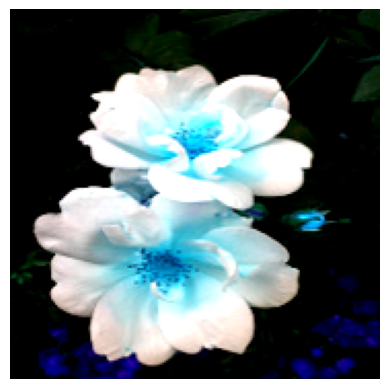

In [55]:
data_augmentation  = keras.Sequential([layers.experimental.preprocessing.RandomContrast(0.9)])
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

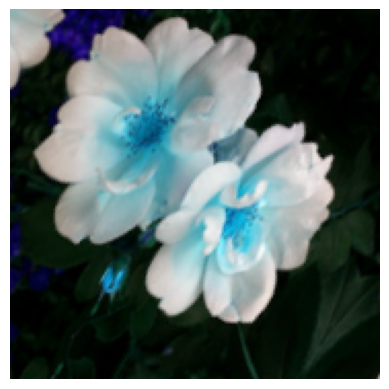

In [56]:
data_augmentation  = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.5)])
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Let's make the model robust through data augmentation

In [58]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Train the model using data augmentation and a drop out layer

In [59]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 25s 251ms/step - loss: 1.3925 - accuracy: 0.4135
Epoch 2/30
86/86 [==============================] - 22s 251ms/step - loss: 1.0761 - accuracy: 0.5694
Epoch 3/30
86/86 [==============================] - 22s 260ms/step - loss: 0.9682 - accuracy: 0.6195
Epoch 4/30
86/86 [==============================] - 21s 249ms/step - loss: 0.9035 - accuracy: 0.6537
Epoch 5/30
86/86 [==============================] - 21s 250ms/step - loss: 0.8476 - accuracy: 0.6719
Epoch 6/30
86/86 [==============================] - 21s 248ms/step - loss: 0.8336 - accuracy: 0.6864
Epoch 7/30
86/86 [==============================] - 21s 249ms/step - loss: 0.7714 - accuracy: 0.7115
Epoch 8/30
86/86 [==============================] - 21s 248ms/step - loss: 0.7511 - accuracy: 0.7144
Epoch 9/30
86/86 [==============================] - 21s 249ms/step - loss: 0.7002 - accuracy: 0.7431
Epoch 10/30
86/86 [==============================] - 21s 249ms/step - loss: 0.6751 - accura

In [61]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 73ms/step - loss: 3.6446 - accuracy: 0.2658


[3.644641160964966, 0.26579520106315613]